In [3]:
from IPython.display import Image

# GGS416 Satellite Image Analysis - Week 4 

In this tutorial we are going to explore how `numpy` provides support functions for `rasterio`.

As the `numpy` library provides support for large, multi-dimensional arrays and matrices, the package is widely used by a variety (in fact, most) other python packages, including: `Pandas`, `SciPy`, `Matplotlib`, `scikit-learn`, `scikit-image` etc.

See here for more details: https://en.wikipedia.org/wiki/NumPy

Let's begin by loading an image we have already downloaded:


In [7]:
# First we need to import rasterio (Remember: it stands for raster input output - rasterio)
import rasterio

# Then we can open our image file and create a rasterio object
my_image = rasterio.open("../week3/20190321_174348_0f1a_3B_AnalyticMS.tif")
my_image

<open DatasetReader name='../week3/20190321_174348_0f1a_3B_AnalyticMS.tif' mode='r'>

As this is a 4-band PlanetScope image, we are then able to parse out these image bands to new variables.

In [22]:
# So we can use the rasterio read function and allocate our bands to blue, green, red and near-infrared
blue, green, red, nir = my_image.read()

# Each one is a numpy array of our data:
blue

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

Each `numpy` array is essentially a grid of different pixels with values.

We can confirm this is a `numpy` array by checking the data type!

In [23]:
# Bands are stored as Numpy arrays.
print(type(blue))

<class 'numpy.ndarray'>


"A raster graphic is a mechanism that represents a two-dimensional image as a rectangular matrix or grid of square pixels. A raster is technically characterized by the width and height of the image in pixels and by the number of bits per pixel."

See here for more info on raster structures: https://en.wikipedia.org/wiki/Raster_graphics

So let's look at this Digital Elevation Model raster below for Humboldt County in Northern California:

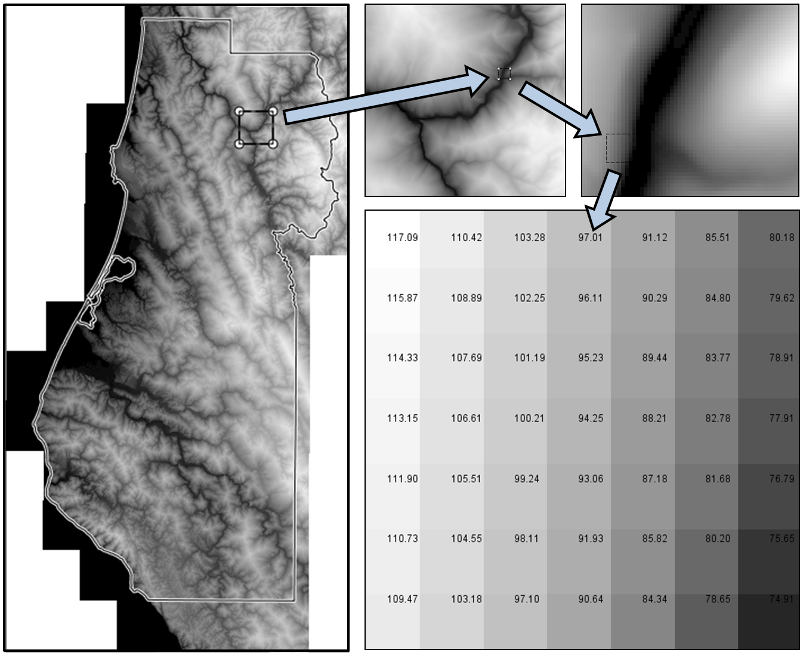

In [5]:
Image("images/RasterPixels.png")

# Credit to 
# https://gsp.humboldt.edu/olm/Lessons/GIS/08%20Rasters/RasterDataModels3.html

This should give you an idea of how these raster layers are composed. 

Now let's take a look at satellite image raster pixels:

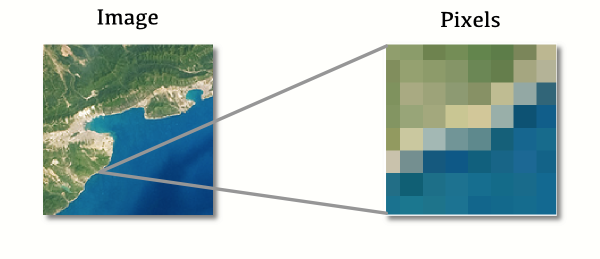

In [14]:
Image("images/pixels.png")

# Credit to 
# https://mapschool.io/

The difference with color satellite imagery is that our raster pixels are indicating color shades.

This example below is a stylized example of how pixels showing comparable colors have similar underlying data:

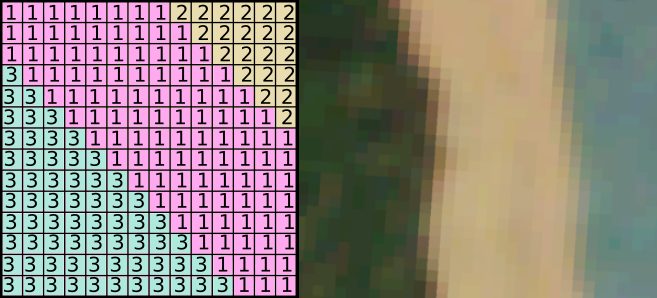

In [18]:
Image("images/Pixels2.png")

# Credit to 
# https://github.com/sarasafavi/remote-sensing-with-python/tree/master/notebooks

Thus, a single raster band has two dimensions consisting of rows and columns.

In [30]:
# We can confirm this using the ndim function.
# ndim stands for number of dimensions
print(blue.ndim)

2


We can also explore the type of underlying data that we have stored in these pixel grids:

In [32]:
# So here we have 16-bit unsigned integers
# These are integers which can range between 0 and 65,535
print(blue.dtype)

uint16


For all the pixels in our data, we are able to use the `min()` and `max()` functions to find the range of values.
- `min()` represents the minimum data value in a given array. 
- `max()` represents the maximum data value in a given array.

In [40]:
# Let's print the minimum and maximum values
list_of_our_bands = [blue, green, red, nir]
for band in list_of_our_bands:
    print("min {min} max {max}".format(min=band.min(), max=band.max()))

min 0 max 30256
min 0 max 20671
min 0 max 27564
min 0 max 33932


We can extract information from the raster layer using indexing.

For example, here we can try to obtain the values for a pixel which is 5 km east and 5 km south of the top left corner. Let's get the x and y coordinates first. Remember our Planet image is in the Universal Transverse Mercator (UTM) projection, and here we are measuring in meters (so not in degrees or feet, for example). 


In [50]:
import math

# World coordinates for the desired pixel.
x_coord = my_image.bounds.left + 5000
y_coord = my_image.bounds.top - 5000
print('Our x and y cordinates are: {}, {}'.format(x_coord, y_coord))

Our x and y cordinates are: 549491.0, 4186009.0




Next, we can use the `index()` function for our `rasterio` object. This converts for our world coordinates in UTM into row and column indexes.

This may not be a precise transform, so the `op` argument allows us to control for how values are rounded.

In [54]:
# So we give the index function our coordinates
# math.floor round numbers down to the nearest integer
col, row = my_image.index(x_coord, y_coord, op=math.floor)

# Let's make sure we have integers
col = int(col)
row = int(row)

print(col, row)

1666 1666


Now we have our column and row indexes, we can use them to index into our `numpy` array raster data.

This demonstrates that we have an integer number of 2344 for red, 3658 for green, 4445 for blue, and 969 for NIR.

In [55]:
# Now let's look at the value of each band at this pixel
print("Red: {}".format(red[row, col]))
print("Green: {}".format(green[row, col]))
print("Blue: {}".format(blue[row, col]))
print("NIR: {}".format(nir[row, col]))

Red: 2344
Green: 3658
Blue: 4445
NIR: 969


# Congratulations

In this tutorial we examined the relationship between `numpy` and `rasterio`.

This included exploring:
- The structure of raster data.
- How our raster pixel grid data is converted into `numpy` arrays. 
- Checking the different dimensions of our raster data.
- Extracting specific pixel values using geographic coordinates.